In [1]:
# Intializing libraries

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# Connecting to Google Drive folder

from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/DATA 606 - Capstone Project/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
# Loading the dataset into a dataframe from Google Drive

df = pd.read_csv('/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_result.csv')

In [4]:
# Dataframe Shape

df.shape

(2208111, 17)

In [5]:
# Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208111 entries, 0 to 2208110
Data columns (total 17 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   product_title                      object
 1   product_category                   object
 2   star_rating                        int64 
 3   verified_purchase                  object
 4   review_headline                    object
 5   review_body                        object
 6   review_date                        object
 7   CLEAN_REVIEW_TEXT                  object
 8   CLEAN_PRODUCT_TITLE                object
 9   CLEAN_REVIEW_TITLE                 object
 10  Logistic_Regression_Pred           int64 
 11  Decision_Tree_Classification_Pred  int64 
 12  Gradient_Boosting_Classifier_Pred  int64 
 13  Random_Forest_Classifier_Pred      int64 
 14  PassiveAggressiveClassifier_Pred   int64 
 15  MultinomialNB_Pred                 int64 
 16  SVM_Pred                           i

In [6]:
# First 5 rows of the dataset

df.head()

,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE,Logistic_Regression_Pred,Decision_Tree_Classification_Pred,Gradient_Boosting_Classifier_Pred,Random_Forest_Classifier_Pred,PassiveAggressiveClassifier_Pred,MultinomialNB_Pred,SVM_Pred
0,The Sandman Vol. 1: Preludes and Nocturnes,Books,4,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below,1,1,1,1,1,1,1
1,The 22 Immutable Laws of Marketing,Books,4,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome,1,1,1,1,1,1,1
2,Contact,Books,5,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30,this is book about first contact with aliens w...,contact,read the book it good,1,1,1,1,1,1,1
3,Good Omens,Books,5,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11,this is quite possibly the funniest book have ...,good omens,funniest book ever written about the anti christ,1,1,1,1,1,1,1
4,A Confederacy of Dunces,Books,5,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17,the story behind the book is almost better tha...,a confederacy of dunces,a winner that didn last only mothers love rema...,1,1,1,1,0,1,1


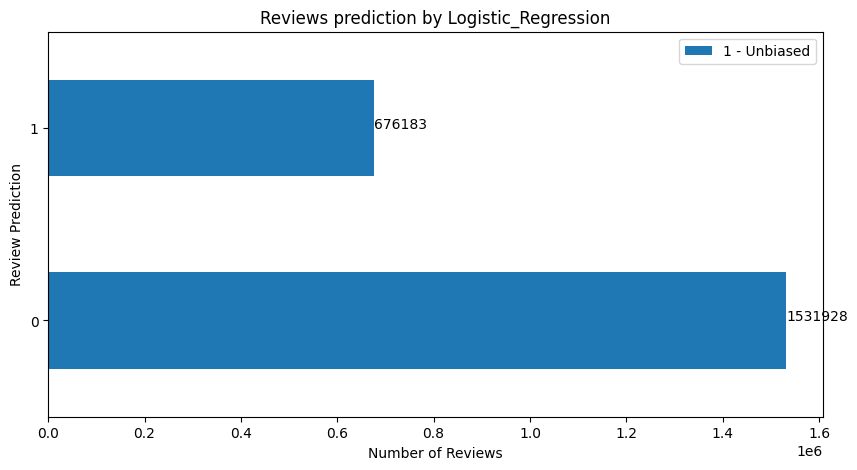

In [7]:
# Plotting prediction of reviews by Logistic_Regression

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by Logistic_Regression')
df['Logistic_Regression_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['Logistic_Regression_Pred'].value_counts()):
    plt.text(value, index, str(value))

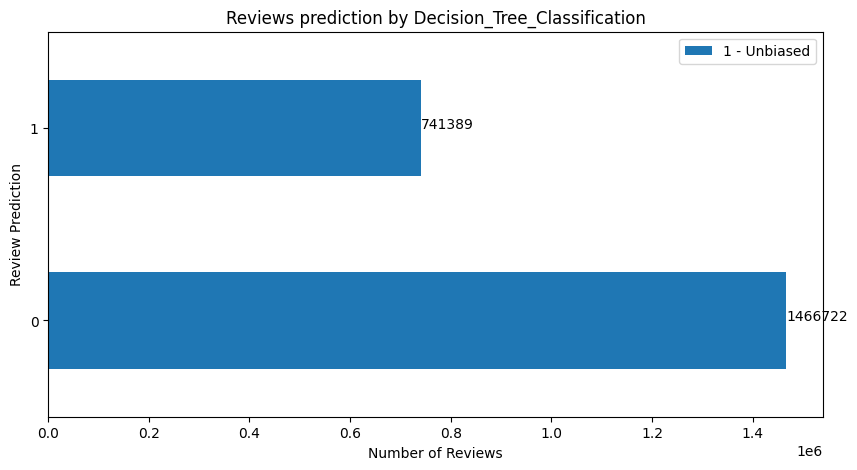

In [8]:
# Plotting prediction of reviews by Decision_Tree_Classification

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by Decision_Tree_Classification')
df['Decision_Tree_Classification_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['Decision_Tree_Classification_Pred'].value_counts()):
    plt.text(value, index, str(value))

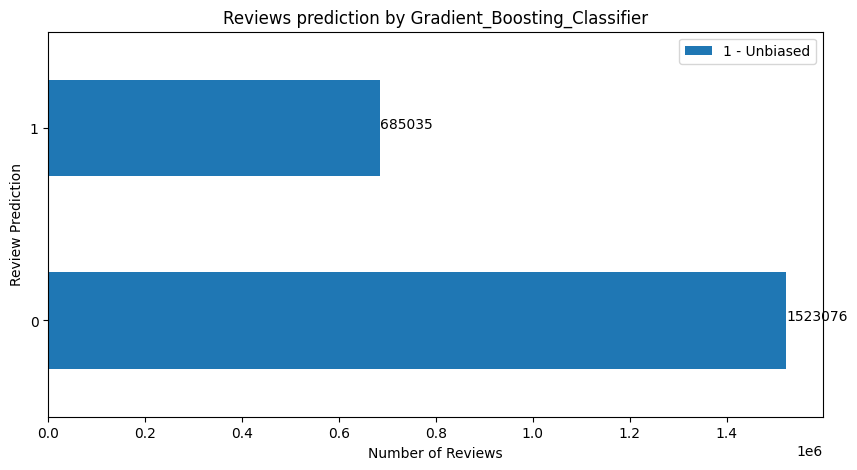

In [9]:
# Plotting prediction of reviews by Gradient_Boosting_Classifier

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by Gradient_Boosting_Classifier')
df['Gradient_Boosting_Classifier_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['Gradient_Boosting_Classifier_Pred'].value_counts()):
    plt.text(value, index, str(value))

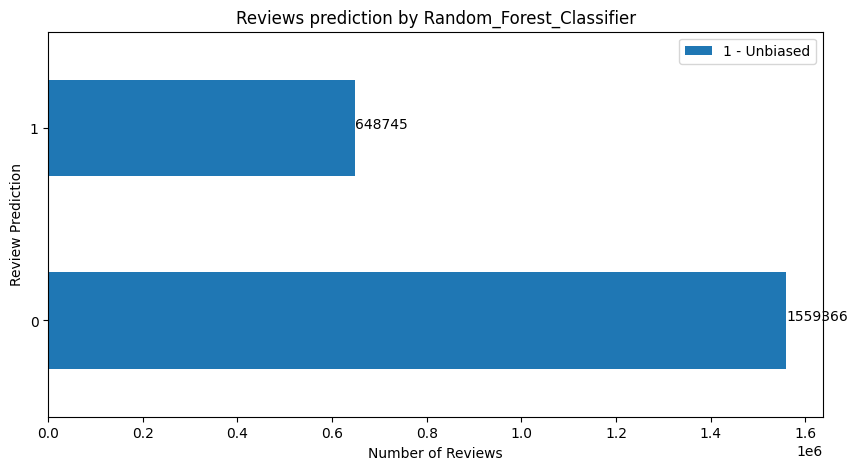

In [10]:
# Plotting prediction of reviews by Random_Forest_Classifier

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by Random_Forest_Classifier')
df['Random_Forest_Classifier_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['Random_Forest_Classifier_Pred'].value_counts()):
    plt.text(value, index, str(value))

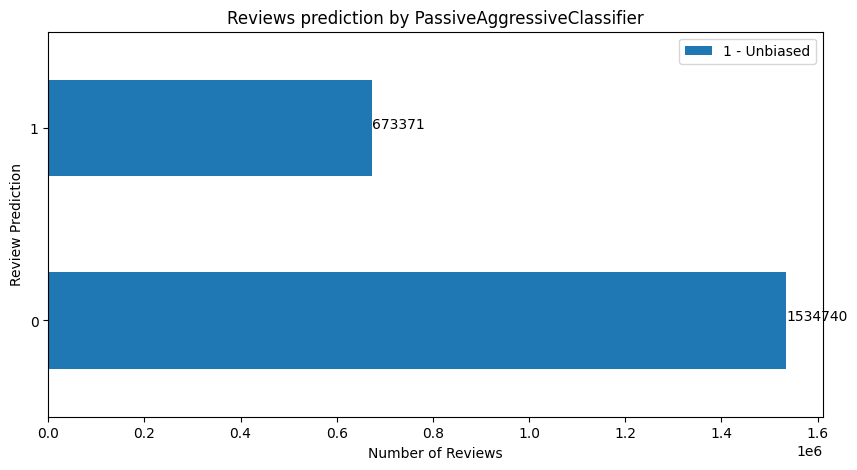

In [11]:
# Plotting prediction of reviews by PassiveAggressiveClassifier

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by PassiveAggressiveClassifier')
df['PassiveAggressiveClassifier_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['PassiveAggressiveClassifier_Pred'].value_counts()):
    plt.text(value, index, str(value))

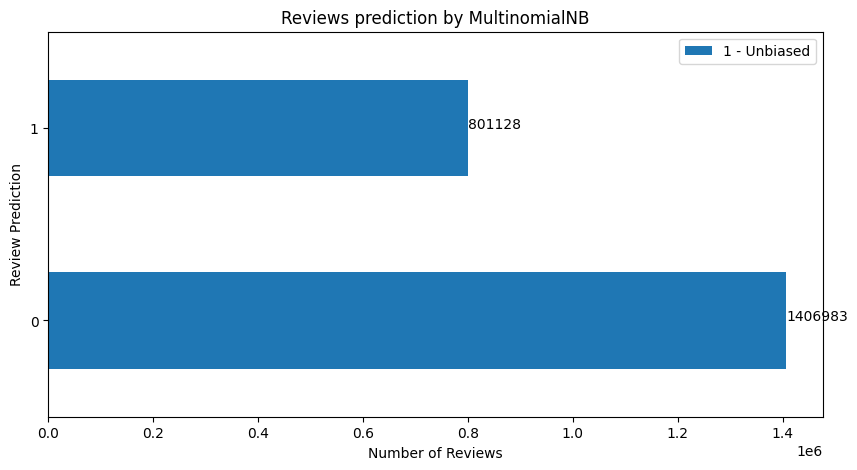

In [12]:
# Plotting prediction of reviews by MultinomialNB

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by MultinomialNB')
df['MultinomialNB_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['MultinomialNB_Pred'].value_counts()):
    plt.text(value, index, str(value))

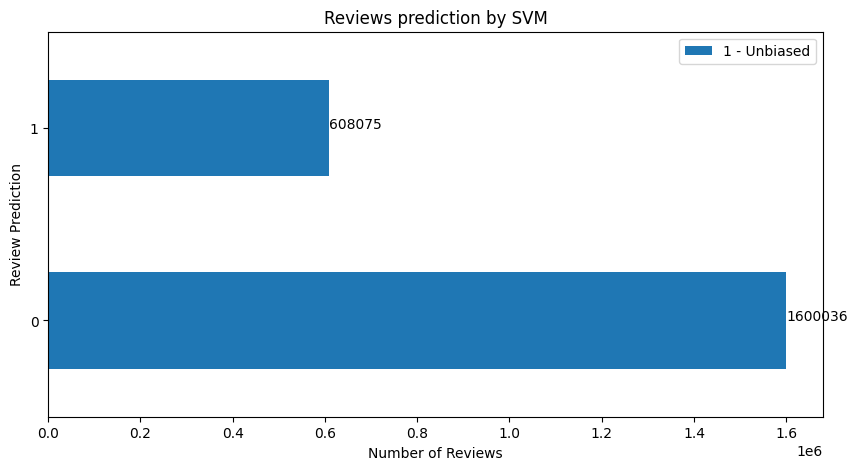

In [13]:
# Plotting prediction of reviews by SVM

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Review Prediction')
plt.title('Reviews prediction by SVM')
df['SVM_Pred'].value_counts().plot.barh(figsize = (10,5))
plt.legend(["1 - Unbiased","0 - Biased"])
for index, value in enumerate(df['SVM_Pred'].value_counts()):
    plt.text(value, index, str(value))

In [30]:
df_results = pd.DataFrame(df['Logistic_Regression_Pred'].value_counts())
df_results['Decision_Tree_Classification_Pred'] = df['Decision_Tree_Classification_Pred'].value_counts()
df_results['Gradient_Boosting_Classifier_Pred'] = df['Gradient_Boosting_Classifier_Pred'].value_counts()
df_results['Random_Forest_Classifier_Pred'] = df['Random_Forest_Classifier_Pred'].value_counts()
df_results['PassiveAggressiveClassifier_Pred'] = df['PassiveAggressiveClassifier_Pred'].value_counts()
df_results['MultinomialNB_Pred'] = df['MultinomialNB_Pred'].value_counts()
df_results['SVM_Pred'] = df['SVM_Pred'].value_counts()

In [34]:
df_results = df_results.swapaxes("index", "columns")

In [36]:
df_results.columns = ['Biased', 'Unbiased']

In [37]:
df_results

,Biased,Unbiased
Logistic_Regression_Pred,1531928,676183
Decision_Tree_Classification_Pred,1466722,741389
Gradient_Boosting_Classifier_Pred,1523076,685035
Random_Forest_Classifier_Pred,1559366,648745
PassiveAggressiveClassifier_Pred,1534740,673371
MultinomialNB_Pred,1406983,801128
SVM_Pred,1600036,608075


In [42]:
# Saving the dataset into a dataframe from Google Drive

df_results.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/prediction_result.csv')